# Projeto 2 - Ciência dos Dados

Nome: Gabriela Yukari Mitu

Nome: Gabriella Escobar Cukier

___
# Classificador automático de sentimento


## Preparando o ambiente no jupyter:

In [164]:
%%capture

#Instalando o tweepy
!pip install tweepy

In [165]:
import tweepy
import math
import os.path
import pandas as pd
import json
from random import shuffle
import nltk
from nltk.corpus import stopwords

___
### Montando o Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

In [334]:
tweets_treinamento = pd.read_excel('Android.xlsx',sheet_name=0)
tweets_treinamento["Categoria"] = tweets_treinamento["Categoria"].replace(0,"Irrelevante")
tweets_treinamento["Categoria"] = tweets_treinamento["Categoria"].replace(1,"Pouco relevante")
tweets_treinamento["Categoria"] = tweets_treinamento["Categoria"].replace(2,"Relevante")
tweets_treinamento["Categoria"] = tweets_treinamento["Categoria"].replace(3,"Muito relevante")


tweets_treinamento["Relevância"] = tweets_treinamento["Relevância"].replace(0,"Irrelevante")
tweets_treinamento["Relevância"] = tweets_treinamento["Relevância"].replace(1,"Relevante")


tweets_treinamento.tail()

,Treinamento,Relevância,Categoria
645,android 10 acabou silenciosamente com uma func...,Relevante,Muito relevante
646,"@toodivaforyou abo twitter for android sai só,...",Irrelevante,Irrelevante
647,vir pra casa da mazao e deixar o carregador em...,Irrelevante,Irrelevante
648,@dmpedrovieira @diogoafsimoes @androidgeekpt @...,Irrelevante,Irrelevante
649,@tunaosabesnd o android será sempre melhor só ...,Relevante,Muito relevante


In [335]:
tweets_teste= pd.read_excel("Android.xlsx",sheet_name=1) 
tweets_teste["Categoria"] = tweets_teste["Categoria"].replace(0,"Irrelevante")
tweets_teste["Categoria"] = tweets_teste["Categoria"].replace(1,"Pouco relevante")
tweets_teste["Categoria"] = tweets_teste["Categoria"].replace(2,"Relevante")
tweets_teste["Categoria"] = tweets_teste["Categoria"].replace(3,"Muito relevante")

tweets_teste["Relevância"] = tweets_teste["Relevância"].replace(0,"Irrelevante")
tweets_teste["Relevância"] = tweets_teste["Relevância"].replace(1,"Relevante")

tweets_teste.head()

,Teste,Relevância,Categoria
0,@caldasm16 nao tanto quanto android pode ter ctz,Irrelevante,Irrelevante
1,"libertei-me do iphone. agora, tenho bateria du...",Relevante,Relevante
2,responda a breves pesquisas e seja recompensad...,Irrelevante,Irrelevante
3,uber e lyft são acusados de cobrança de taxa a...,Irrelevante,Irrelevante
4,"@luisscp_1906 sim para android, em qualidade e...",Relevante,Pouco relevante


## Limpeza das bases

In [336]:
def limpeza(tweets, coluna):
    tweets[coluna] = tweets[coluna].apply(lambda x: x.lower())

    for frase in tweets[coluna]:
        frase_split = frase.split(" ")
        for palavra in frase_split:
            if len(palavra) == 1:
                frase_split.remove(palavra)



    nltk.download('stopwords')
    stop = stopwords.words('portuguese')
    stop_list = ["?", "de", "é", "á", "à", "ao", "a", "o", "é", "rt", '"', "“", "'", ",", ":", ".", "(", ")", "!", "$", "%", "*", "&", "-", "+", "=", "/"]
    stop.extend(stop_list)
    tweets[coluna] = [' '.join([w for w in x.lower().split() if w not in stop]) 
        for x in tweets[coluna].tolist()]
    
    
        

    tweets[coluna] = tweets[coluna].str.replace("  "," ")
    tweets[coluna] = tweets[coluna].str.replace(",","")
    tweets[coluna] = tweets[coluna].str.replace("?","")
    tweets[coluna] = tweets[coluna].str.replace("'","")
    tweets[coluna] = tweets[coluna].str.replace('"',"")
    tweets[coluna] = tweets[coluna].str.replace("“","")
    tweets[coluna] = tweets[coluna].str.replace(":","")
    tweets[coluna] = tweets[coluna].str.replace(".","")
    tweets[coluna] = tweets[coluna].str.replace(")","")
    tweets[coluna] = tweets[coluna].str.replace("(","")
    tweets[coluna] = tweets[coluna].str.replace("!","")
    tweets[coluna] = tweets[coluna].str.replace("$","")
    tweets[coluna] = tweets[coluna].str.replace("%","")
    tweets[coluna] = tweets[coluna].str.replace("*","")
    tweets[coluna] = tweets[coluna].str.replace("&","")
    tweets[coluna] = tweets[coluna].str.replace("-","")
    tweets[coluna] = tweets[coluna].str.replace("+","")
    tweets[coluna] = tweets[coluna].str.replace("=","")
    tweets[coluna] = tweets[coluna].str.replace("/","")
    tweets[coluna] = tweets[coluna].str.replace("@","")
    tweets[coluna] = tweets[coluna].str.replace("|","")

    return pd.DataFrame(tweets)

In [337]:
tweets = limpeza(tweets_treinamento, "Treinamento")

irrel=tweets['Treinamento'][tweets['Relevância'] == "Irrelevante"]
rele=tweets['Treinamento'][tweets['Relevância'] == "Relevante"]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Frequência absoluta - relevante e irrelevante

In [338]:
conteudo = []
for t in tweets["Treinamento"]: 
    pal = t.split()
    for p in pal:
            conteudo.append(p)
            
texto=" ".join(conteudo)
series= pd.Series(texto.split())
freq = series.value_counts()
totalt=freq.sum()
print("Frequência absoluta (relevante e irrelevante): ", totalt)
dict_tot =freq.to_dict()


Frequência absoluta (relevante e irrelevante):  7531


## Dicionário da categoria relevante, frequência absoluta e relativa

In [339]:
conteudo = []
for t in rele: 
    pal = t.split()
    for p in pal:
            conteudo.append(p)
texto=" ".join(conteudo)
series= pd.Series(texto.split())
freq = series.value_counts()
totrele=freq.sum()
print("Frequência absoluta: ",totrele)
di_rele=freq.to_dict()
frele=totrele/totalt
print("Frequência relativa: ",frele)

Frequência absoluta:  874
Frequência relativa:  0.11605364493427167


In [340]:
dicionario_relevante={}
for p in dict_tot.keys():
    dicionario_relevante[p]=1
for palavra in di_rele:
    dicionario_relevante[palavra]+=di_rele[palavra]
print("Dicionário - categoria relevante:")

m=0
for k in dicionario_relevante:
    while m<1:
        print ("Termo mais utilizado: ",k + ": " + str(dicionario_relevante[k]) + " vezes")
        m+=1

Dicionário - categoria relevante:
Termo mais utilizado:  android: 79 vezes


## Dicionário da categoria irrelevante, frequência absoluta e relativa

In [343]:
conteudo = []
for t in irrel: 
    pal = t.split()
    for p in pal:
            conteudo.append(p)
texto=" ".join(conteudo)
series= pd.Series(texto.split())
freq = series.value_counts()
totirr=freq.sum()
print("Frequência absoluta: ",totirr)
di_irr=freq.to_dict()
firr=totirr/totalt
print("Frequência relativa: ",firr)

Frequência absoluta:  6657
Frequência relativa:  0.8839463550657283


In [344]:
dicionario_irrelevante={}
for p in dict_tot.keys():
    dicionario_irrelevante[p]=1
for palavra in di_irr:
    dicionario_irrelevante[palavra]+=di_irr[palavra]
print("Dicionário - categoria irrelevante")

m=0
for k in dicionario_irrelevante:
    while m<1:
        print ("Termo mais utilizado: ", k + ": " + str(dicionario_irrelevante[k]) + " vezes")
        m+=1


Dicionário - categoria irrelevante
Termo mais utilizado:  android: 494 vezes


## Verificação da performance

In [345]:
irrel ={}
rel ={}

todas_palavras=dict_tot.keys()
for palavra in todas_palavras:
    irrel[palavra]= dicionario_irrelevante[palavra]/(len(todas_palavras)+(totirr+1))
    rel[palavra]= dicionario_relevante[palavra]/(len(todas_palavras)+(totrele+1))


In [346]:
dftw = limpeza(tweets_teste,"Teste")
tweets=dftw["Teste"]
chute = []

for frase in tweets:
    prob_irrel=1
    prob_rel=1
    y = frase.split(" ")
    for palavra in y: 
        if palavra in irrel:
            prob_irrel *= irrel[palavra]
        else:
            prob_irrel *= 1/ (len(todas_palavras)+(totirr+1))
        
        if palavra in rel:
            prob_rel *= rel[palavra]
        else:
            prob_rel *= 1/ (len(todas_palavras)+(totrele+1))
       
    PI= (firr*prob_irrel)
    PR = (frele*prob_rel)

    if PR>=PI:
        chute.append("Relevante")
    else:
        chute.append("Irrelevante")


dftw["Chute"]=chute
dftw.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Teste,Relevância,Categoria,Chute
0,caldasm16 nao tanto quanto android pode ter ctz,Irrelevante,Irrelevante,Irrelevante
1,liberteime iphone agora bateria durante dia me...,Relevante,Relevante,Irrelevante
2,responda breves pesquisas recompensado faça do...,Irrelevante,Irrelevante,Irrelevante
3,uber lyft acusados cobrança taxa acima prometi...,Irrelevante,Irrelevante,Irrelevante
4,luisscp_1906 sim android qualidade melhor dois...,Relevante,Pouco relevante,Irrelevante


### Tabela de distribuição conjunta - previsão do programa e classificação real

In [175]:
matriz = pd.crosstab(dftw["Relevância"], dftw["Chute"], margins=True, normalize=True, rownames=["Real"], colnames=["Predito"])
matriz

Predito,Irrelevante,Relevante,All
Real,,,
Irrelevante,0.666667,0.217778,0.884444
Relevante,0.088889,0.026667,0.115556
All,0.755556,0.244444,1.000000


### Previsão:

In [176]:
numero_acerto = (dftw["Relevância"] == dftw["Chute"]).value_counts()
eficiencia=numero_acerto[True]/len(dftw)
print("O classificador acertou as previsões em {} dos casos".format(eficiencia*100))


O classificador acertou as previsões em 69.33333333333334 dos casos


### Heatmap

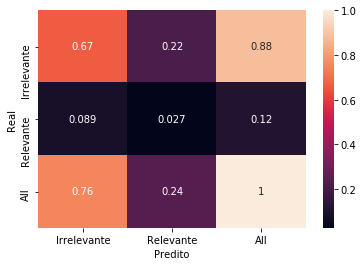

In [177]:
sn.heatmap(matriz, annot=True)

A fim de melhorar a visualização de dados, foi criado um heatmap com as informações adquiridas com os códigos anteriores. Desta forma, há a presença de todo um data set com ambas as variáveis instantaneamente.

Como resposta do classficador, houve cerca de 69,3% de acertos. Entretanto, para melhorar o desempenho dele, foi feito um outro teste, porém, desta vez, acrescentando uma nova variável categórica, assim determinadas palavras se tornariam mais específicas para cada categoria definida.

## Categoria Naive-Bayes com 3 categorias

### Limpeza:

In [275]:
tweets = limpeza(tweets_treinamento, "Treinamento")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [276]:
tweets=tweets[tweets['Relevância']=="Relevante"]
tweets.head()

,Treinamento,Relevância,Categoria
31,eeveeevolution sistema android muitos muitos b...,Relevante,Muito relevante
47,android atualizou ficou foda,Relevante,Pouco relevante
52,tava vendo uns print antigos usava android aí ...,Relevante,Pouco relevante
53,tunaosabesnd mano preço exorbitante podes pega...,Relevante,Relevante
58,android ruim mano saudades iphone 😪,Relevante,Relevante


### Definindo as categorias:

In [277]:
npr=tweets['Treinamento'][tweets['Categoria'] == "Pouco relevante"]
nr=tweets['Treinamento'][tweets['Categoria'] == "Relevante"]
nmr=tweets['Treinamento'][tweets['Categoria'] == "Muito relevante"]

### Frequências absoluta e relativa (desta vez, em apenas um código):

In [281]:
conteudo = []
for t in tweets["Treinamento"]: 
    pal = t.split()
    for p in pal:
            conteudo.append(p)
            
texto=" ".join(conteudo)
series= pd.Series(texto.split())
freq = series.value_counts()
totalt=freq.sum()
print("Frequência absoluta Total (Pouco Relevante, Relevante, muito Relevante: ",totalt)
dict_tot =freq.to_dict()

print('-'*25)

conteudo = []
for t in npr: 
    pal = t.split()
    for p in pal:
            conteudo.append(p)
texto=" ".join(conteudo)
series= pd.Series(texto.split())
freq = series.value_counts()
tnpr=freq.sum()
print("Frequência absoluta (Pouco Relevante): ",tnpr)
dnpr=freq.to_dict()
fnpr=tnpr/totalt
print("Frequência relativa (Pouco Relevante): ",fnpr)

dinpr={}
for p in dict_tot.keys():
    dinpr[p]=1
for palavra in dnpr:
    dinpr[palavra]+=dnpr[palavra]

    
print('-'*25)
    
conteudo = []
for t in nr: 
    pal = t.split()
    for p in pal:
            conteudo.append(p)
texto=" ".join(conteudo)
series= pd.Series(texto.split())
freq = series.value_counts()
tnr=freq.sum()
print("Frequência absoluta (Relevante): ",tnr)
dnr=freq.to_dict()
fnr=tnr/totalt
print("Frequência relativa (Relevante): ",fnr)

dinr={}
for p in dict_tot.keys():
    dinr[p]=1
for palavra in dnr:
    dinr[palavra]+=dnr[palavra]

    
print('-'*25)


conteudo = []
for t in nmr: 
    pal = t.split()
    for p in pal:
            conteudo.append(p)
texto=" ".join(conteudo)
series= pd.Series(texto.split())
freq = series.value_counts()
tnmr=freq.sum()
print("Frequência absoluta (Muito Relevante): ",tnmr)
dnmr=freq.to_dict()
fnmr=tnmr/totalt
print("Frequência absoluta (Muito Relevante): ", fnmr)

dinmr={}
for p in dict_tot.keys():
    dinmr[p]=1
for palavra in dnmr:
    dinmr[palavra]+=dnmr[palavra]

Frequência absoluta Total (Pouco Relevante, Relevante, muito Relevante:  868
-------------------------
Frequência absoluta (Pouco Relevante):  258
Frequência relativa (Pouco Relevante):  0.29723502304147464
-------------------------
Frequência absoluta (Relevante):  373
Frequência relativa (Relevante):  0.42972350230414746
-------------------------
Frequência absoluta (Muito Relevante):  237
Frequência absoluta (Muito Relevante):  0.2730414746543779


In [182]:
pourel ={}
rel ={}
muirel = {}

todas_palavras=dict_tot.keys()
for palavra in todas_palavras:
    pourel[palavra]= dinpr[palavra]/(len(todas_palavras)+(tnpr+1))
    rel[palavra]= dinr[palavra]/(len(todas_palavras)+(tnr+1))
    muirel[palavra]= dinmr[palavra]/(len(todas_palavras)+(tnmr+1))



In [183]:
dftw = limpeza(tweets_teste,"Teste")
dftw=dftw[dftw['Relevância']=="Relevante"]
dftw.head()
tweets=dftw["Teste"]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [184]:

chute = []

for frase in tweets:
    prob_irrel=1
    prob_prel=1
    prob_rel=1
    prob_mrel=1
    y = frase.split(" ")
    for palavra in y: 
        
        if palavra in pourel:
            prob_prel *= pourel[palavra]
        else:
            prob_prel *= 1/ (len(todas_palavras)+(tnpr+1))
            
        if palavra in rel:
            prob_rel *= rel[palavra]
        else:
            prob_rel *= 1/ (len(todas_palavras)+(tnr+1))
            
        if palavra in muirel:
            prob_mrel*= muirel[palavra]
        else:
            prob_mrel *= 1/(len(todas_palavras)+(tnmr+1))
         
    PPR =(freq_rel_pr*prob_prel)
    PR = (freq_rel_r*prob_rel)
    PMR=( freq_rel_mr*prob_mrel)

    if PMR >= PR and PMR>=PPR:
        chute.append("Muito relevante")

    elif PR>=PPR:
        chute.append("Relevante")

    else:
        chute.append("Pouco relevante")
    
dftw["Chute"]=chute
dftw.tail(9)

,Teste,Relevância,Categoria,Chute
375,android atualizou ta horriveeeeeeel,Relevante,Pouco relevante,Pouco relevante
380,adoro android,Relevante,Pouco relevante,Pouco relevante
385,2 dias to iphone vi nunca volto pro android,Relevante,Relevante,Relevante
388,unica coisa prende apple neste momento câmera ...,Relevante,Relevante,Relevante
404,souzalucas14345 allissonrey wassupmor trava ce...,Relevante,Muito relevante,Muito relevante
411,diegofadul usei tbm mt tempo desde 2012 ios an...,Relevante,Relevante,Relevante
422,5g revolução chegando novo android suporta tec...,Relevante,Relevante,Relevante
435,android 9 eh absurdo questão eh bateria google...,Relevante,Muito relevante,Pouco relevante
440,android 10 perfeito defeitos httpstcokaigppdnse,Relevante,Pouco relevante,Muito relevante


### Previsão:

In [185]:
numero_acerto = (dftw["Categoria"] == dftw["Chute"]).value_counts()
eficiencia=numero_acerto[True]/len(dftw)
print("O classificador acertou as previsões em {} dos casos".format(eficiencia*100))

O classificador acertou as previsões em 71.15384615384616 dos casos


In [186]:
matriz = pd.crosstab(dftw["Categoria"], dftw["Chute"], margins=True, normalize=True, rownames=["Real"], colnames=["Predito"])
matriz

Predito,Muito relevante,Pouco relevante,Relevante,All
Real,,,,
Muito relevante,0.115385,0.057692,0.019231,0.192308
Pouco relevante,0.115385,0.269231,0.057692,0.442308
Relevante,0.019231,0.019231,0.326923,0.365385
All,0.250000,0.346154,0.403846,1.000000


### Heatmap

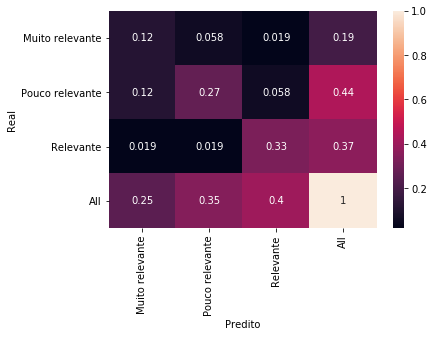

In [187]:
import pandas as pd
import seaborn as sn


sn.heatmap(matriz, annot=True)

Com o mesmo objetivo de melhor visualização de dados do heatmap anterior, foi platado este com a diferença de uma terceira categoria. Como foi previsto, o desempenho do classificador foi otimizado, acertando agora cerca de 71,1% as previsões.

## Categoria Naive-Bayes com 4 categorias

In [188]:
tweets = limpeza(tweets_treinamento, "Treinamento")

tweets_irrel=tweets['Treinamento'][tweets['Categoria'] == "Irrelevante"]
tweets_rel=tweets['Treinamento'][tweets['Categoria'] == "Relevante"]
tweets_prel=tweets['Treinamento'][tweets['Categoria'] == "Pouco relevante"]
tweets_mrel=tweets['Treinamento'][tweets['Categoria'] == "Muito relevante"]



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Total de palavras

In [189]:
conteudo = []
for t in tweets["Treinamento"]: 
    pal = t.split()
    for p in pal:
            conteudo.append(p)
            
texto=" ".join(conteudo)
series= pd.Series(texto.split())
freq = series.value_counts()
totalt=freq.sum()
print(totalt)
dict_tot =freq.to_dict()


7472


## Palavras na categoria "irrelevante"

In [190]:
conteudo = []
for t in tweets_irrel: 
    pal = t.split()
    for p in pal:
            conteudo.append(p)
texto=" ".join(conteudo)
series= pd.Series(texto.split())
freq = series.value_counts()
totalir=freq.sum()
print(totalir)
dict_irrel=freq.to_dict()
freq_rel_irr=totalir/totalt
print(freq_rel_irr)


6604
0.8838329764453962


In [191]:
dicionario_irrel={}
for p in dict_tot.keys():
    dicionario_irrel[p]=1
for palavra in dict_irrel:
    dicionario_irrel[palavra]+=dict_irrel[palavra]

## Palavras na categoria "pouco relevantes"

In [192]:
conteudo = []
for t in tweets_prel: 
    pal = t.split()
    for p in pal:
            conteudo.append(p)
texto=" ".join(conteudo)
series= pd.Series(texto.split())
freq = series.value_counts()
totalpr=freq.sum()
print(totalpr)
dict_prel=freq.to_dict()
freq_rel_pr=totalpr/totalt
print(freq_rel_pr)


258
0.0345289079229122


In [193]:
dicionario_prel={}
for p in dict_tot.keys():
    dicionario_prel[p]=1
for palavra in dict_prel:
    dicionario_prel[palavra]+=dict_prel[palavra]
dicionario_prel

{'android': 35,
 'pra': 3,
 'ios': 2,
 'iphone': 2,
 'celular': 5,
 'app': 3,
 'q': 3,
 'pro': 2,
 '10': 1,
 'agora': 3,
 'vai': 2,
 'twitter': 3,
 'modo': 3,
 'preto': 1,
 'google': 1,
 'ser': 1,
 'pq': 2,
 'aplicativo': 1,
 '9': 2,
 'tá': 3,
 'ter': 1,
 'bom': 2,
 'ainda': 3,
 'melhor': 4,
 'n': 1,
 'atualização': 5,
 'tudo': 2,
 'vou': 2,
 'fazer': 3,
 'aqui': 2,
 '#android': 1,
 'samsung': 2,
 'sei': 1,
 'gente': 2,
 'nao': 1,
 'eh': 2,
 'usar': 2,
 'disponível': 1,
 'apple': 1,
 'tela': 1,
 'ta': 4,
 'sempre': 1,
 'câmera': 2,
 'novo': 2,
 'to': 3,
 'anos': 1,
 'acho': 2,
 'apps': 1,
 'versão': 2,
 'ai': 1,
 'smartphone': 1,
 'aí': 4,
 'baixe': 1,
 'ver': 1,
 'sim': 2,
 'vc': 1,
 'brunoid_android': 1,
 'tempo': 2,
 'escuro': 1,
 'queria': 1,
 'alguém': 3,
 'fotos': 1,
 'fica': 2,
 'bem': 2,
 'dá': 2,
 'noturno': 3,
 'download': 1,
 'kkk': 1,
 'one': 1,
 'usa': 1,
 'uso': 2,
 'então': 1,
 'tô': 1,
 'celulares': 1,
 'sistema': 1,
 'p': 1,
 'merda': 1,
 'hoje': 2,
 'mim': 1,
 'semana

## Palavras na categoria "relevante"

In [194]:
conteudo = []
for t in tweets_rel: 
    pal = t.split()
    for p in pal:
            conteudo.append(p)
texto=" ".join(conteudo)
series= pd.Series(texto.split())
freq = series.value_counts()
totalr=freq.sum()
print(totalr)
dict_rel=freq.to_dict()
freq_rel_r=totalr/totalt
print(freq_rel_r)


373
0.049919700214132764


In [195]:
dicionario_rel={}
for p in dict_tot.keys():
    dicionario_rel[p]=1
for palavra in dict_rel:
    dicionario_rel[palavra]+=dict_rel[palavra]
dicionario_rel

{'android': 27,
 'pra': 9,
 'ios': 8,
 'iphone': 20,
 'celular': 3,
 'app': 1,
 'q': 2,
 'pro': 2,
 '10': 3,
 'agora': 3,
 'vai': 2,
 'twitter': 1,
 'modo': 1,
 'preto': 1,
 'google': 2,
 'ser': 1,
 'pq': 3,
 'aplicativo': 2,
 '9': 2,
 'tá': 2,
 'ter': 2,
 'bom': 3,
 'ainda': 2,
 'melhor': 7,
 'n': 1,
 'atualização': 1,
 'tudo': 2,
 'vou': 2,
 'fazer': 2,
 'aqui': 1,
 '#android': 2,
 'samsung': 1,
 'sei': 3,
 'gente': 2,
 'nao': 3,
 'eh': 1,
 'usar': 2,
 'disponível': 1,
 'apple': 7,
 'tela': 1,
 'ta': 1,
 'sempre': 3,
 'câmera': 4,
 'novo': 2,
 'to': 2,
 'anos': 1,
 'acho': 2,
 'apps': 1,
 'versão': 1,
 'ai': 2,
 'smartphone': 2,
 'aí': 2,
 'baixe': 1,
 'ver': 3,
 'sim': 2,
 'vc': 2,
 'brunoid_android': 1,
 'tempo': 2,
 'escuro': 1,
 'queria': 1,
 'alguém': 1,
 'fotos': 1,
 'fica': 3,
 'bem': 2,
 'dá': 2,
 'noturno': 1,
 'download': 1,
 'kkk': 2,
 'one': 1,
 'usa': 1,
 'uso': 2,
 'então': 4,
 'tô': 4,
 'celulares': 1,
 'sistema': 1,
 'p': 1,
 'merda': 2,
 'hoje': 2,
 'mim': 2,
 'seman

## Palavras na categoria "muito relevantes"

In [196]:
conteudo = []
for t in tweets_mrel: 
    pal = t.split()
    for p in pal:
            conteudo.append(p)
texto=" ".join(conteudo)
series= pd.Series(texto.split())
freq = series.value_counts()+1
totalmr=freq.sum()
dict_mrel=freq.to_dict()
freq_rel_mr=totalmr/totalt
print(freq_rel_mr)


0.05661134903640257


In [197]:
dicionario_mrel={}
for p in dict_tot.keys():
    dicionario_mrel[p]=1
for palavra in dict_mrel:
    dicionario_mrel[palavra]+=dict_mrel[palavra]
dicionario_mrel

{'android': 20,
 'pra': 4,
 'ios': 4,
 'iphone': 1,
 'celular': 6,
 'app': 1,
 'q': 1,
 'pro': 3,
 '10': 7,
 'agora': 4,
 'vai': 4,
 'twitter': 1,
 'modo': 3,
 'preto': 1,
 'google': 4,
 'ser': 1,
 'pq': 1,
 'aplicativo': 1,
 '9': 3,
 'tá': 3,
 'ter': 3,
 'bom': 3,
 'ainda': 3,
 'melhor': 5,
 'n': 1,
 'atualização': 4,
 'tudo': 1,
 'vou': 1,
 'fazer': 3,
 'aqui': 1,
 '#android': 1,
 'samsung': 3,
 'sei': 1,
 'gente': 1,
 'nao': 1,
 'eh': 1,
 'usar': 1,
 'disponível': 1,
 'apple': 1,
 'tela': 4,
 'ta': 3,
 'sempre': 3,
 'câmera': 1,
 'novo': 3,
 'to': 1,
 'anos': 3,
 'acho': 3,
 'apps': 3,
 'versão': 3,
 'ai': 1,
 'smartphone': 1,
 'aí': 1,
 'baixe': 1,
 'ver': 1,
 'sim': 1,
 'vc': 1,
 'brunoid_android': 1,
 'tempo': 3,
 'escuro': 3,
 'queria': 4,
 'alguém': 1,
 'fotos': 4,
 'fica': 1,
 'bem': 4,
 'dá': 3,
 'noturno': 1,
 'download': 1,
 'kkk': 1,
 'one': 4,
 'usa': 1,
 'uso': 1,
 'então': 1,
 'tô': 1,
 'celulares': 1,
 'sistema': 3,
 'p': 3,
 'merda': 1,
 'hoje': 1,
 'mim': 1,
 'semana

## Implementação do classificador Naive Bayes

In [198]:
irrel ={}
pourel ={}
rel ={}
muirel = {}

todas_palavras=dict_tot.keys()
for palavra in todas_palavras:
    irrel[palavra]= dicionario_irrel[palavra]/(len(todas_palavras)+(totalir+1))
    pourel[palavra]= dicionario_prel[palavra]/(len(todas_palavras)+(totalpr+1))
    rel[palavra]= dicionario_rel[palavra]/(len(todas_palavras)+(totalr+1))
    muirel[palavra]= dicionario_mrel[palavra]/(len(todas_palavras)+(totalmr+1))



In [199]:
dftw = limpeza(tweets_teste,"Teste")
tweets=dftw["Teste"]
chute = []

for frase in tweets:
    prob_irrel=1
    prob_prel=1
    prob_rel=1
    prob_mrel=1
    y = frase.split(" ")
    for palavra in y: 
        if palavra in irrel:
            prob_irrel *= irrel[palavra]
        else:
            prob_irrel *= 1/ (len(todas_palavras)+(totalir+1))
        
        if palavra in pourel:
            prob_prel *= pourel[palavra]
        else:
            prob_prel *= 1/ (len(todas_palavras)+(totalpr+1))
            
        if palavra in rel:
            prob_rel *= rel[palavra]
        else:
            prob_rel *= 1/ (len(todas_palavras)+(totalr+1))
            
        if palavra in muirel:
            prob_mrel*= muirel[palavra]
        else:
            prob_mrel *= 1/(len(todas_palavras)+(totalmr+1))
         
    PI= (freq_rel_irr*prob_irrel)
    PPR =(freq_rel_pr*prob_prel)
    PR = (freq_rel_r*prob_rel)
    PMR=( freq_rel_mr*prob_mrel)

    if PMR >= PR and PMR>=PPR and PMR>=PI:
        chute.append("Muito relevante")

    elif PR>=PI and PR>=PPR:
        chute.append("Relevante")

    elif PPR>=PI:
        chute.append("Pouco relevante")
    else:
        chute.append("Irrelevante")


dftw["Chute"]=chute
dftw.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Teste,Relevância,Categoria,Chute
0,caldasm16 nao tanto quanto android pode ter ctz,Irrelevante,Irrelevante,Irrelevante
1,liberteime iphone agora bateria durante dia me...,Relevante,Relevante,Irrelevante
2,responda breves pesquisas recompensado faça do...,Irrelevante,Irrelevante,Irrelevante
3,uber lyft acusados cobrança taxa acima prometi...,Irrelevante,Irrelevante,Relevante
4,luisscp_1906 sim android qualidade melhor dois...,Relevante,Pouco relevante,Irrelevante


In [200]:
dftw.head()

,Teste,Relevância,Categoria,Chute
0,caldasm16 nao tanto quanto android pode ter ctz,Irrelevante,Irrelevante,Irrelevante
1,liberteime iphone agora bateria durante dia me...,Relevante,Relevante,Irrelevante
2,responda breves pesquisas recompensado faça do...,Irrelevante,Irrelevante,Irrelevante
3,uber lyft acusados cobrança taxa acima prometi...,Irrelevante,Irrelevante,Relevante
4,luisscp_1906 sim android qualidade melhor dois...,Relevante,Pouco relevante,Irrelevante


## Resultados do teste e verificação de performance

In [201]:

numero_acerto = (dftw["Categoria"] == dftw["Chute"]).value_counts()
eficiencia=numero_acerto[True]/len(dftw)
print("O classificador acertou as previsões em {} dos casos".format(eficiencia*100))


O classificador acertou as previsões em 74.66666666666667 dos casos


In [202]:

zero = dftw.loc[(dftw["Categoria"]==0)&(dftw["Chute"]==0), ["Categoria", "Chute"]]
zeroC = dftw.loc[(dftw["Categoria"]!=0)&(dftw["Chute"]==0), ["Categoria", "Chute"]]

um = dftw.loc[(dftw["Categoria"]==1)&(dftw["Chute"]==1), ["Categoria", "Chute"]]
umC = dftw.loc[(dftw["Categoria"]!=1)&(dftw["Chute"]==1), ["Categoria", "Chute"]]

dois = dftw.loc[(dftw["Categoria"]==2)&(dftw["Chute"]==2), ["Categoria", "Chute"]]
doisC = dftw.loc[(dftw["Categoria"]!=2)&(dftw["Chute"]==2), ["Categoria", "Chute"]]

tres = dftw.loc[(dftw["Categoria"]==3)&(dftw["Chute"]==3), ["Categoria", "Chute"]]
tresC= dftw.loc[(dftw["Categoria"]!=3)&(dftw["Chute"]==3), ["Categoria", "Chute"]]


In [203]:
from sklearn.metrics import confusion_matrix
from pandas_ml import ConfusionMatrix
Confusion_Matrix=ConfusionMatrix(dftw["Categoria"], dftw["Chute"])
Confusion_Matrix.print_stats()

Confusion Matrix:

Predicted        Irrelevante  Muito relevante  Pouco relevante  Relevante  \
Actual                                                                      
Irrelevante              331               14               23         30   
Muito relevante            7                3                0          0   
Pouco relevante           21                0                0          2   
Relevante                 17                0                0          2   
__all__                  376               17               23         34   

Predicted        __all__  
Actual                    
Irrelevante          398  
Muito relevante       10  
Pouco relevante       23  
Relevante             19  
__all__              450  


Overall Statistics:

Accuracy: 0.7466666666666667
95% CI: (0.7038297171969113, 0.7862266476404638)
No Information Rate: ToDo
P-Value [Acc > NIR]: 0.9999994103536078
Kappa: 0.004018871221387524
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes

C:\Users\gabri\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


In [204]:
matriz = pd.crosstab(dftw["Categoria"], dftw["Chute"], margins=True, normalize=True, rownames=["Real"], colnames=["Predito"])
matriz

Predito,Irrelevante,Muito relevante,Pouco relevante,Relevante,All
Real,,,,,
Irrelevante,0.735556,0.031111,0.051111,0.066667,0.884444
Muito relevante,0.015556,0.006667,0.000000,0.000000,0.022222
Pouco relevante,0.046667,0.000000,0.000000,0.004444,0.051111
Relevante,0.037778,0.000000,0.000000,0.004444,0.042222
All,0.835556,0.037778,0.051111,0.075556,1.000000


In [205]:

print("Porcentagem de irrelevantes verdadeiros: {}".format((matriz.loc[["Irrelevante"],["Irrelevante"]])*100))
print("Porcentagem de neutros verdadeiros: {0}%".format((matriz.iloc[[2],[2]])*100))
print("Porcentagem de relevantes verdadeiros: {0}%".format((matriz.iloc[[3],[3]])*100))
print("Porcentagem de muito relevante falsos: {0}%".format((matriz.iloc[[4],[4]])*100))

Porcentagem de irrelevantes verdadeiros: Predito      Irrelevante
Real                    
Irrelevante    73.555556
Porcentagem de neutros verdadeiros: Predito          Pouco relevante
Real                            
Pouco relevante              0.0%
Porcentagem de relevantes verdadeiros: Predito    Relevante
Real                
Relevante   0.444444%
Porcentagem de muito relevante falsos: Predito    All
Real          
All      100.0%


### Crosstab - previsão do programa e classificação real

In [211]:
matriz = pd.crosstab(dftw["Categoria"], dftw["Chute"], margins=True, normalize=True, rownames=["Real"], colnames=["Predito"])
matriz

Predito,Irrelevante,Muito relevante,Pouco relevante,Relevante,All
Real,,,,,
Irrelevante,0.735556,0.031111,0.051111,0.066667,0.884444
Muito relevante,0.015556,0.006667,0.000000,0.000000,0.022222
Pouco relevante,0.046667,0.000000,0.000000,0.004444,0.051111
Relevante,0.037778,0.000000,0.000000,0.004444,0.042222
All,0.835556,0.037778,0.051111,0.075556,1.000000


### Heatmap

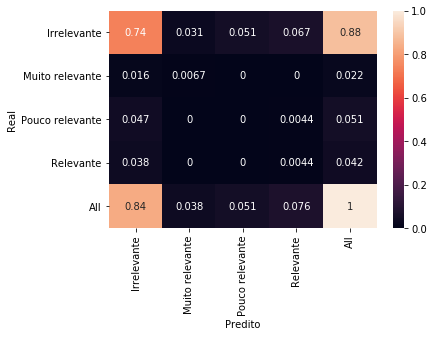

In [212]:
import pandas as pd
import seaborn as sn


sn.heatmap(matriz, annot=True)

In [104]:
dftw = limpeza(tweets_teste,"Teste")
dftw.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Teste,Relevância,Categoria,Chute
0,caldasm16 nao tanto quanto android pode ter ctz,Irrelevante,Irrelevante,Irrelevante
1,liberteime iphone agora bateria durante dia me...,Relevante,Relevante,Irrelevante
2,responda breves pesquisas recompensado faça do...,Irrelevante,Irrelevante,Irrelevante
3,uber lyft acusados cobrança taxa acima prometi...,Irrelevante,Irrelevante,Relevante
4,luisscp_1906 sim android qualidade melhor dois...,Relevante,Pouco relevante,Irrelevante


In [213]:
dftw=dftw[dftw['Relevância']=="Relevante"]
dftw.head()

,Teste,Relevância,Categoria,Chute
1,liberteime iphone agora bateria durante dia me...,Relevante,Relevante,Irrelevante
4,luisscp_1906 sim android qualidade melhor dois...,Relevante,Pouco relevante,Irrelevante
13,plzkillmeaaaaaa realmente compro android pq fo...,Relevante,Relevante,Irrelevante
14,ios 13 vem funcionalidades todo android simple...,Relevante,Relevante,Irrelevante
15,wassupmor c vc gosta android ir pro ios meio r...,Relevante,Relevante,Irrelevante


In [ ]:
conteudo = []
for t in dftw["Treinamento"]: 
    pal = t.split()
    for p in pal:
            conteudo.append(p)
            
texto=" ".join(conteudo)
series= pd.Series(texto.split())
freq = series.value_counts()
totalt=freq.sum()
print(totalt)
dict_tot =freq.to_dict()


conteudo = []
for t in tweets_irrel: 
    pal = t.split()
    for p in pal:
            conteudo.append(p)
texto=" ".join(conteudo)
series= pd.Series(texto.split())
freq = series.value_counts()
totalir=freq.sum()
print(totalir)
dict_irrel=freq.to_dict()
freq_rel_irr=totalir/totalt
print(freq_rel_irr)


In [50]:
#Verificar a porcentagem de acerto do classificador (precisão)
previsao = []
for frase in tweets_teste["Teste"]:
    previsao.append(prob_palavra(frase, palavras_rel, palavras_irrel))
tweets_teste["Previsão"] = previsao
tweets_teste

numero_acerto = tweets_teste["Teste"][tweets_teste["Categoria"] == tweets_teste["Previsão"]].count()
numero_acerto

print(numero_acerto/len(tweets_teste) * 100,"% de acerto")

NameError: name 'prob_palavra' is not defined

In [51]:
um = nike_limpao.loc[(nike_limpao["Relevância"]==1)&(nike_limpao["Chute"]==1), ["Relevância", "Chute"]]
umC = nike_limpao.loc[(nike_limpao["Relevância"]==0)&(nike_limpao["Chute"]==1), ["Relevância", "Chute"]]
zero = nike_limpao.loc[(nike_limpao["Relevância"]==0)&(nike_limpao["Chute"]==0), ["Relevância", "Chute"]]
zeroC = nike_limpao.loc[(nike_limpao["Relevância"]==1)&(nike_limpao["Chute"]==0), ["Relevância", "Chute"]]
    
pos_ver = (len(um)/len(nike_limpao["Relevância"]))*100
pos_fal = (len(umC)/len(nike_limpao["Relevância"]))*100
neg_ver = (len(zero)/len(nike_limpao["Relevância"]))*100
neg_fal= (len(zeroC)/len(nike_limpao["Relevância"]))*100

print("Porcentagem de positivos falsos: {0}%".format(pos_fal))
print("Porcentagem de positivos verdadeiros: {0}%".format(pos_ver))
print("Porcentagem de negativos verdadeiros: {0}%".format(neg_ver))
print("Porcentagem de negativos falsos: {0}%".format(neg_fal))


NameError: name 'nike_limpao' is not defined

___
### Concluindo

Através da análise realizada, é possível afirmar que há pontos a serem melhorados, dentre eles, o fato de que alguns tweets apresentam sarcasmo, algo que pode ser bastante complicado para ensinar ao classificador identificar e categorizar.


Outro ponto é o maior número de categorias, que foi confirmado por meio da análise ser uma prática eficiente para a melhoria do desempenho do programa. Entretanto, indubitavelmente, tal aplicação não deve ser utilizada de forma desnecessária. Com os três tipos de categorização feitos - duas, três e quatro tipos de categorias - é possível obervar que há uma diferença postiva mas não tão significativa a ponto de ser necessária muito mais categorias. Um número muito grande de categorias pode até aumentar a precisão, mas deixará a análsie mais desorganizada. Assim, opta-se por outras alternativas de melhorias e aperfeiçoamento.



___
### Como podemos melhorar?

Para o aperfeiçoamento do machine learning, pode-se tomar como possibilidade o aumento da base de treinamento e classificá-la, promovendo maior proximidade com a realidade. Outro ponto é o aumento de categorias como já foi explicado na conclusão para a análise mais profunda.

___
### **Aperfeiçoamento**:

Os trabalhos vão evoluir em conceito dependendo da quantidade de itens avançados:

* Limpar: \n, :, ", ', (, ), etc SEM remover emojis
* Corrigir separação de espaços entre palavras e emojis ou emojis e emojis
* Propor outras limpezas e transformações que não afetem a qualidade da informação ou classificação
* Criar categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante (3 categorias: C, mais categorias conta para B)
* Explicar por que não posso usar o próprio classificador para gerar mais amostras de treinamento
* Propor diferentes cenários para Naïve Bayes fora do contexto do projeto
* Sugerir e explicar melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)
* Montar um dashboard que periodicamente realiza análise de sentimento e visualiza estes dados

___
### Material de pesquisa

- Material disponível nos slides e jupyter no Blackboard

- https://stackoverflow.com/questions/12286607/making-heatmap-from-pandas-dataframe

- https://twitter.com/home?lang=pt-br

- [Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

- [A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**